# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline
import seaborn as sns
import sqlite3
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')


# Read tables

In [2]:

db_name  = 'sqlite.db'
def open_sql( db_name, table):
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    cur.execute("SELECT * FROM " + table) 
    col_names = [cn[0] for cn in cur.description]
    rows = cur.fetchall()
    data = pd.DataFrame(columns = col_names, data = rows)
#     print(col_names)
#     print(rows) 
#     con.close()
    return data

items = open_sql(db_name, 'items')
payment_method = open_sql(db_name, 'payment_method')
transactions = open_sql(db_name, 'transactions')
        


In [3]:
def summary(df): 
    table = pd.DataFrame(df.dtypes, columns = ['dtype'])
    table.reset_index(inplace = True)
    table.rename(columns = {'index': 'Name'}, inplace = True)
    table['count'] = len(df)
    table['Missing']= df.isnull().sum().values
    table['Unique'] = df.nunique().values
    table['Values'] = df.loc[0].values
    return table

In [4]:
summary(items)

,Name,dtype,count,Missing,Unique,Values
0,index,int64,87,0,87,0
1,ITEMID,object,87,0,86,7039010132435
2,Description,object,87,0,87,STABB.LEVERPOSTEI 100G


In [5]:
summary(payment_method)

,Name,dtype,count,Missing,Unique,Values
0,index,int64,8,0,8,0
1,TENDERTYPECODE,int64,8,0,8,3101
2,DESCRIPTION ENG,object,8,0,8,Cash


In [6]:
summary(transactions)

,Name,dtype,count,Missing,Unique,Values
0,index,int64,11019079,0,11019079,0
1,RETAILNUMBER,int64,11019079,0,244,0
2,TRANSACTIONID,object,11019079,0,1309910,1fa385933cd905c
3,BEGINTIMESTAMP,object,11019079,0,1222155,2019-05-01 09:13:25+00:00
4,SALESAMOUNT,float64,11019079,0,36460,35.7
5,ITEMID,object,11019079,0,70354,7025165007704
6,TENDERTYPECODE,int64,11019079,0,24,3330
7,CUSTCARDNUMBER,object,11019079,0,14999,48e94c9b32


In [8]:
#merge all the tables
transactions_merge_items = transactions.merge(items[['ITEMID', 'Description']], on = 'ITEMID', how = 'left')
df = transactions_merge_items.merge(payment_method[['TENDERTYPECODE','DESCRIPTION ENG']], on = 'TENDERTYPECODE', how = 'left')
df.head()

,index,RETAILNUMBER,TRANSACTIONID,BEGINTIMESTAMP,SALESAMOUNT,ITEMID,TENDERTYPECODE,CUSTCARDNUMBER,Description,DESCRIPTION ENG
0,0,0,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.70,7025165007704,3330,48e94c9b32,NaN,NaN
1,1,1,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.04,2067600800001,3330,48e94c9b32,NaN,NaN
2,2,0,aa106b840c959f9,2019-05-01 09:32:18+00:00,49.90,3029330065401,3330,76d0883e6f,NaN,NaN
3,3,1,aa106b840c959f9,2019-05-01 09:32:18+00:00,43.30,7025110168160,3330,76d0883e6f,NaN,NaN
4,5,3,aa106b840c959f9,2019-05-01 09:32:18+00:00,21.90,7021010001057,3330,76d0883e6f,NUGATTI 500G,NaN


In [9]:
summary(df)

,Name,dtype,count,Missing,Unique,Values
0,index,int64,11032305,0,11019079,0
1,RETAILNUMBER,int64,11032305,0,244,0
2,TRANSACTIONID,object,11032305,0,1309910,1fa385933cd905c
3,BEGINTIMESTAMP,object,11032305,0,1222155,2019-05-01 09:13:25+00:00
4,SALESAMOUNT,float64,11032305,0,36460,35.7
5,ITEMID,object,11032305,0,70354,7025165007704
6,TENDERTYPECODE,int64,11032305,0,24,3330
7,CUSTCARDNUMBER,object,11032305,0,14999,48e94c9b32
8,Description,object,11032305,9133719,87,NaN
9,DESCRIPTION ENG,object,11032305,7858156,7,NaN


In [10]:
df.BEGINTIMESTAMP = pd.to_datetime(df.BEGINTIMESTAMP)

In [11]:
df.drop(columns = ['index'], axis = 1, inplace = True)

In [12]:
summary(df)

,Name,dtype,count,Missing,Unique,Values
0,RETAILNUMBER,int64,11032305,0,244,0
1,TRANSACTIONID,object,11032305,0,1309910,1fa385933cd905c
2,BEGINTIMESTAMP,"datetime64[ns, UTC]",11032305,0,1222155,2019-05-01 09:13:25+00:00
3,SALESAMOUNT,float64,11032305,0,36460,35.7
4,ITEMID,object,11032305,0,70354,7025165007704
5,TENDERTYPECODE,int64,11032305,0,24,3330
6,CUSTCARDNUMBER,object,11032305,0,14999,48e94c9b32
7,Description,object,11032305,9133719,87,NaN
8,DESCRIPTION ENG,object,11032305,7858156,7,NaN


In [72]:
df.head(10)

,index,RETAILNUMBER,TRANSACTIONID,BEGINTIMESTAMP,SALESAMOUNT,ITEMID,TENDERTYPECODE,CUSTCARDNUMBER,Description,DESCRIPTION ENG
0,0,0,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.70,7025165007704,3330,48e94c9b32,NaN,NaN
1,1,1,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.04,2067600800001,3330,48e94c9b32,NaN,NaN
2,2,0,aa106b840c959f9,2019-05-01 09:32:18+00:00,49.90,3029330065401,3330,76d0883e6f,NaN,NaN
3,3,1,aa106b840c959f9,2019-05-01 09:32:18+00:00,43.30,7025110168160,3330,76d0883e6f,NaN,NaN
4,5,3,aa106b840c959f9,2019-05-01 09:32:18+00:00,21.90,7021010001057,3330,76d0883e6f,NUGATTI 500G,NaN
5,7,0,c268581891d8e01,2019-05-01 09:32:41+00:00,23.90,7044610874661,3330,afa236a7af,PEPSI MAX 0.5L FL,NaN
6,9,2,c268581891d8e01,2019-05-01 09:32:41+00:00,16.50,7039010149020,3330,afa236a7af,STABBUR-MAKRELL 170G,NaN
7,10,3,c268581891d8e01,2019-05-01 09:32:41+00:00,16.50,7039010149020,3330,afa236a7af,STABBUR-MAKRELL 170G,NaN
8,11,4,c268581891d8e01,2019-05-01 09:32:41+00:00,38.90,7025165007926,3330,afa236a7af,NaN,NaN
9,12,0,4f7392e2758ad40,2019-05-01 09:57:25+00:00,15.00,1165,3330,d71ee7a878,NaN,NaN


In [13]:
min(df.BEGINTIMESTAMP), max(df.BEGINTIMESTAMP)

(Timestamp('2019-05-01 09:13:25+0000', tz='UTC'),
 Timestamp('2019-12-31 22:32:24+0000', tz='UTC'))

# Explore data

## Top 10 Items

In [15]:
df['customer_group'] = df.TENDERTYPECODE.apply(lambda x: 'royal' if x == 3398 else 'regular')
df.head()

,RETAILNUMBER,TRANSACTIONID,BEGINTIMESTAMP,SALESAMOUNT,ITEMID,TENDERTYPECODE,CUSTCARDNUMBER,Description,DESCRIPTION ENG,customer_group
0,0,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.70,7025165007704,3330,48e94c9b32,NaN,NaN,regular
1,1,1fa385933cd905c,2019-05-01 09:13:25+00:00,35.04,2067600800001,3330,48e94c9b32,NaN,NaN,regular
2,0,aa106b840c959f9,2019-05-01 09:32:18+00:00,49.90,3029330065401,3330,76d0883e6f,NaN,NaN,regular
3,1,aa106b840c959f9,2019-05-01 09:32:18+00:00,43.30,7025110168160,3330,76d0883e6f,NaN,NaN,regular
4,3,aa106b840c959f9,2019-05-01 09:32:18+00:00,21.90,7021010001057,3330,76d0883e6f,NUGATTI 500G,NaN,regular


<AxesSubplot:xlabel='ITEMID', ylabel='SALESAMOUNT'>

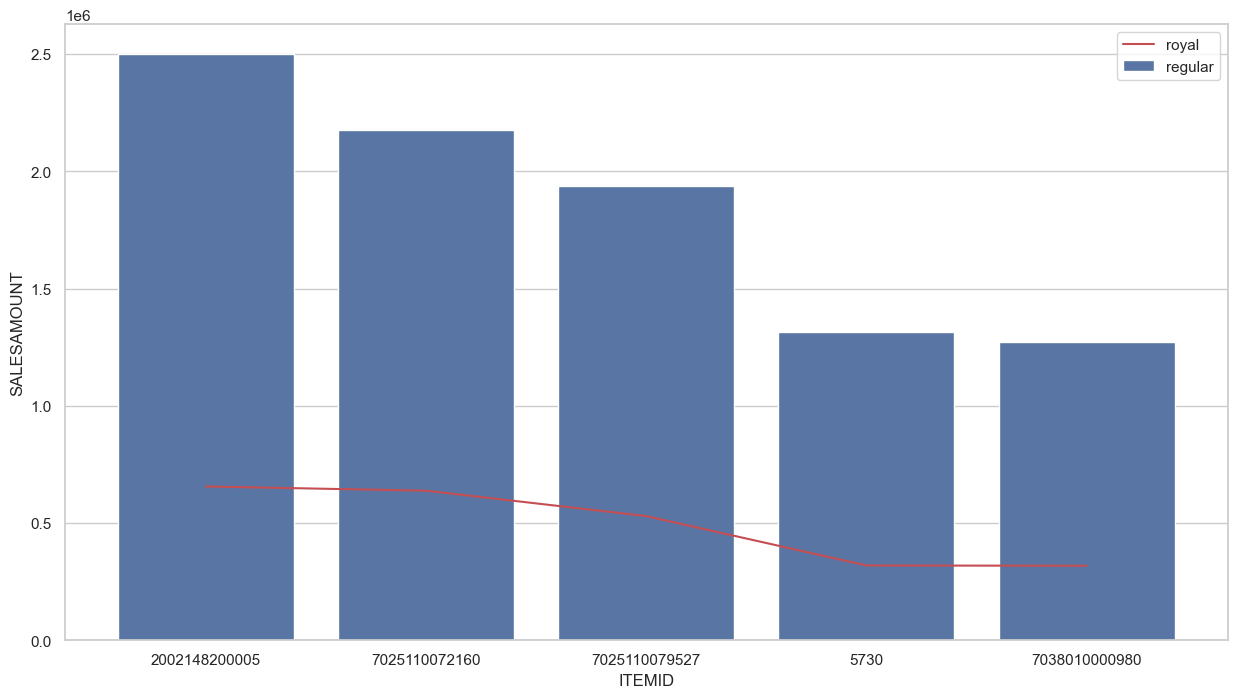

In [28]:
items_reg_agg = df[df.customer_group.eq('regular')].groupby(['ITEMID'], as_index = False)[['SALESAMOUNT']].sum().sort_values(by = ['SALESAMOUNT'],ascending = False)[:5]
items_roy_agg = df[df.customer_group.eq('royal')].groupby(['ITEMID'], as_index = False)[['SALESAMOUNT']].sum().sort_values(by = ['SALESAMOUNT'],ascending = False)[:5]

plt.figure(figsize = (15,8))
# plt.title("Top 10 Items)
sns.barplot(data = items_reg_agg, x = 'ITEMID', y = 'SALESAMOUNT', label = 'regular', color ='b')
sns.lineplot(data = items_roy_agg, x = 'ITEMID', y = 'SALESAMOUNT', label = 'royal', color = 'r')

## Weekly Sales

Text(0.5, 1.0, 'Sales Trend')

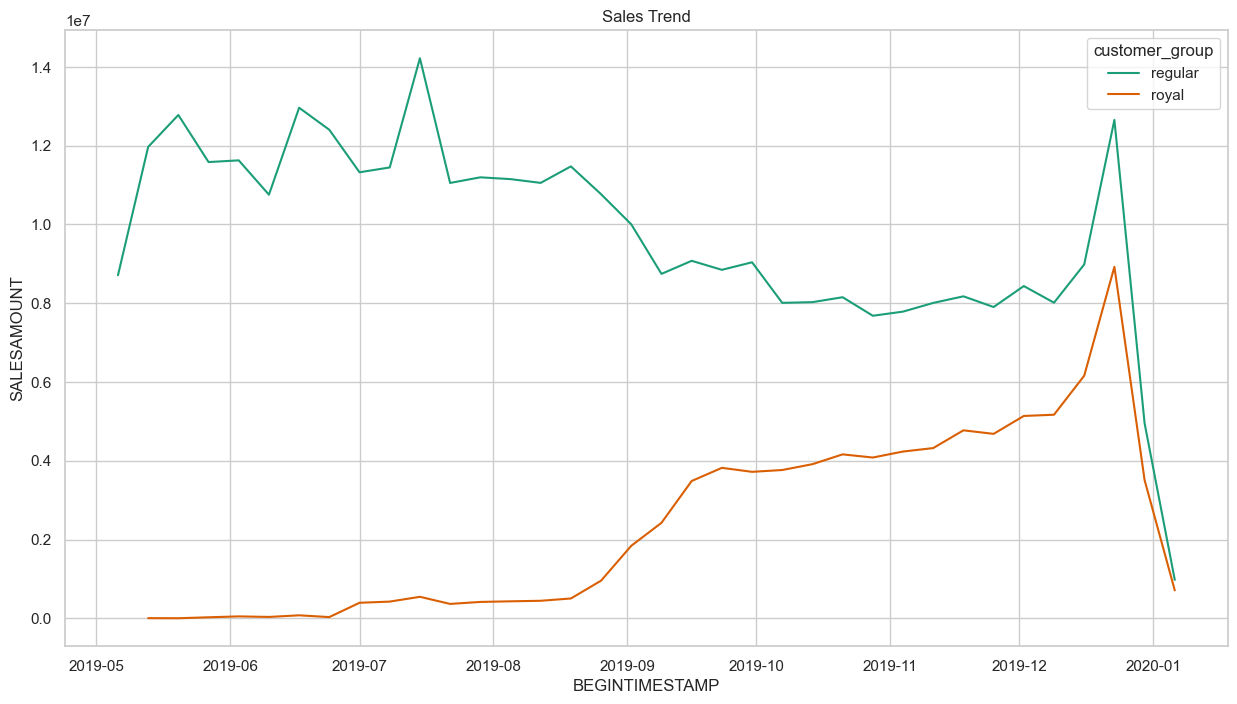

In [25]:
sales_wk = df.groupby('customer_group').resample('W-Mon', on = 'BEGINTIMESTAMP').agg({'SALESAMOUNT':'sum'}).reset_index().sort_values(by='BEGINTIMESTAMP')
#Plot the sales trend 
plt.figure(figsize = (15,8))
sns.lineplot(data = sales_wk, y = 'SALESAMOUNT', x = 'BEGINTIMESTAMP', hue = 'customer_group')
plt.title('Sales Trend')

## Daily Sales

<AxesSubplot:xlabel='BEGINTIMESTAMP', ylabel='SALESAMOUNT'>

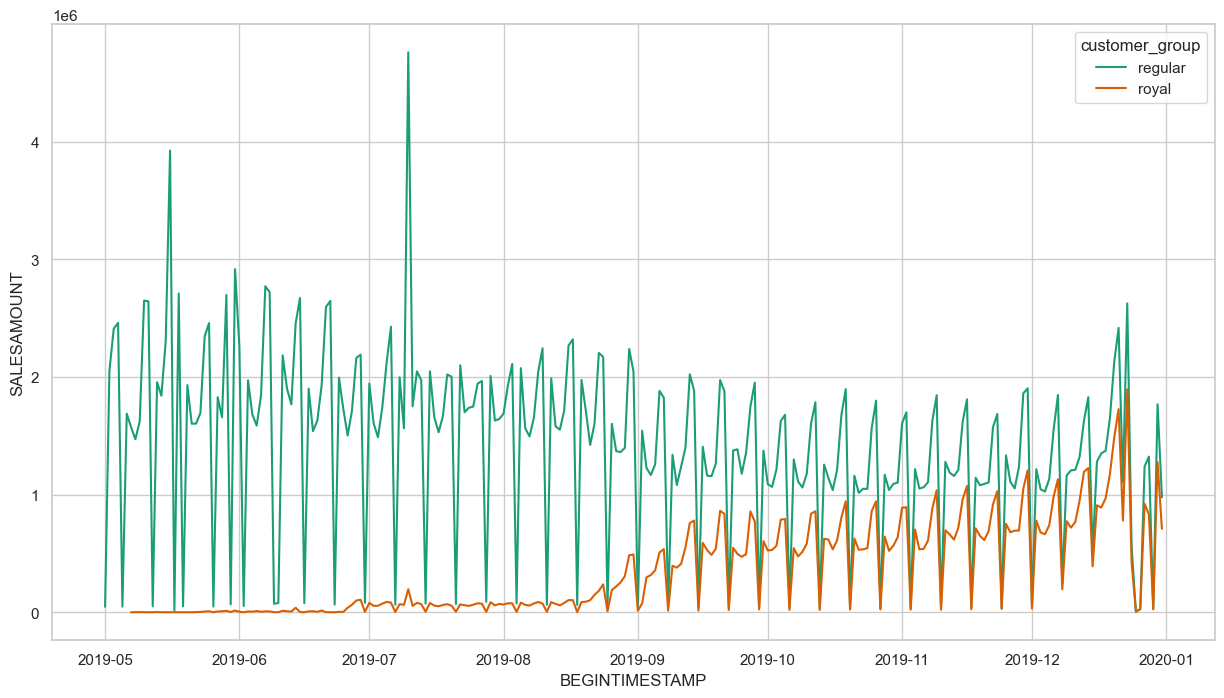

In [26]:
plt.figure(figsize = (15,8))
sales_day = df.groupby('customer_group').resample('D',on = 'BEGINTIMESTAMP').agg({'SALESAMOUNT':'sum'}).reset_index().sort_values(by='BEGINTIMESTAMP')
sns.lineplot(data = sales_day, y = 'SALESAMOUNT', x = 'BEGINTIMESTAMP', hue = 'customer_group')

# Analyze data

In [56]:
def r_score(x, quintiles):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, quintiles, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  
    
segt_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at risk',
        r'[1-2]5': 'can\'t loose',
        r'3[1-2]': 'about to sleep',
        r'33': 'need attention',
        r'[3-4][4-5]': 'loyal customers',
        r'41': 'promising',
        r'51': 'new customers',
        r'[4-5][2-3]': 'potential loyalists',
        r'5[4-5]': 'champions'
    }

def RFM(Coopay):
    data = Coopay.copy()
    data = data.groupby(['BEGINTIMESTAMP', 'CUSTCARDNUMBER'], as_index = False).agg(
        {'SALESAMOUNT': sum
#          , 'ITEMID': pd.Series.nunique, 'TRANSACTIONID': pd.Series.nunique
        })
    NOW = data['BEGINTIMESTAMP'].max() + timedelta(days=1)
    period = (data['BEGINTIMESTAMP'].max() - data['BEGINTIMESTAMP'].min()).days
    # Prepare data for Coopay
    data['DaysSincePurchase'] = data['BEGINTIMESTAMP'].apply(lambda x: (NOW - x).days)
    aggr = {
        'DaysSincePurchase': lambda x: x.min(),  # the number of days since last order (Recency)
        'BEGINTIMESTAMP': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
    }
    rfm = data.groupby('CUSTCARDNUMBER').agg(aggr).reset_index()
    rfm.rename(columns={'DaysSincePurchase': 'Recency', 'BEGINTIMESTAMP': 'Frequency'}, inplace=True)
    rfm['Monetary'] = rfm['CUSTCARDNUMBER'].apply(lambda x: data[(data['CUSTCARDNUMBER'] == x) & \
                                                               (data['BEGINTIMESTAMP'] >= NOW - timedelta(days=period))]\
                                                               ['SALESAMOUNT'].sum())
    quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()

    rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x, quintiles))
    rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, quintiles, 'Frequency'))
    rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, quintiles, 'Monetary'))
    rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

    rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
    rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
    return rfm

def plot_rf(rfm): 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    for i, p in enumerate(['R', 'F']):
        parameters = {'R':'Recency', 'F':'Frequency'}
        y = rfm[p].value_counts().sort_index()
        x = y.index
        ax = axes[i]
        bars = ax.bar(x, y, color='silver')
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_title('Distribution of {}'.format(parameters[p]),
                    fontsize=14)
        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value - 5,
                    '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
                   ha='center',
                   va='top',
                   color='w')

    plt.show()
def plot_rfm(rfm_titles): 
    # plot the distribution of M for RF score
    fig, axes = plt.subplots(nrows=5, ncols=5,
                             sharex=False, sharey=True,
                             figsize=(10, 10))

    r_range = range(1, 6)
    f_range = range(1, 6)
    name =[x for x in globals() if globals()[x] is rfm_titles][0].split('_')[1]
    for r in r_range:
        for f in f_range:
            y = rfm_titles[(rfm_titles['R'] == r) & (rfm_titles['F'] == f)]['M'].value_counts().sort_index()
            x = y.index
            ax = axes[r - 1, f - 1]
            bars = ax.bar(x, y, color='silver')
            if r == 5:
                if f == 3:
                    ax.set_xlabel('{}\nF'.format(f), va='top')
                else:
                    ax.set_xlabel('{}\n'.format(f), va='top')
            if f == 1:
                if r == 3:
                    ax.set_ylabel('R\n{}'.format(r))
                else:
                    ax.set_ylabel(r)
            ax.set_frame_on(False)
            ax.tick_params(left=False, labelleft=False, bottom=False)
            ax.set_xticks(x)
            ax.set_xticklabels(x, fontsize=8)

            for bar in bars:
                value = bar.get_height()
                if value == y.max():
                    bar.set_color('firebrick')
                ax.text(bar.get_x() + bar.get_width() / 2,
                        value,
                        int(value),
                        ha='center',
                        va='bottom',
                        color='k')
    fig.suptitle(f'Distribution of M for each F and R for {name} customers',
                 fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_custnum(rfm_titles):     
    # count the number of customers in each segment
    segments_counts = rfm_titles['Segment'].value_counts().sort_values(ascending=True)

    fig, ax = plt.subplots()
    name =[x for x in globals() if globals()[x] is rfm_titles][0].split('_')[1]


    bars = ax.barh(range(len(segments_counts)),
                  segments_counts,
                  color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False,
                   bottom=False,
                   labelbottom=False)
    ax.set_yticks(range(len(segments_counts)))
    ax.set_yticklabels(segments_counts.index)

    for i, bar in enumerate(bars):
            value = bar.get_width()
            if segments_counts.index[i] in ['champions', 'loyal customers']:
                bar.set_color('firebrick')
            ax.text(value,
                    bar.get_y() + bar.get_height()/2,
                    '{:,} ({:}%)'.format(int(value),
                                       int(value*100/segments_counts.sum())),
                    va='center',
                    ha='left'
                   )

    plt.title('')
    plt.show()


## Compare RFM groups in Royal customers and Regular customers

In [30]:
rfm_regular = RFM(df[df.customer_group.eq('regular')])
rfm_regular.head()

,CUSTCARDNUMBER,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00000576f6,97,3,2069.57,1,1,1,111,hibernating
1,00014e1f5a,10,42,8871.11,3,3,2,332,need attention
2,00026c34bb,1,19,4054.05,5,1,1,511,new customers
3,0002b86220,4,69,28245.45,4,4,4,444,loyal customers
4,00053e6ae2,9,48,5624.76,3,3,1,331,need attention


In [31]:
rfm_royal = RFM(df[df.customer_group.eq('royal')])
rfm_royal.head()

,CUSTCARDNUMBER,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00000576f6,105,1,311.83,1,1,1,111,hibernating
1,00026c34bb,10,11,3036.21,3,3,3,333,need attention
2,00053e6ae2,91,1,75.24,1,1,1,111,hibernating
3,0008abab13,1,67,13050.79,5,5,5,555,champions
4,000a110370,1,254,34709.20,5,5,5,555,champions


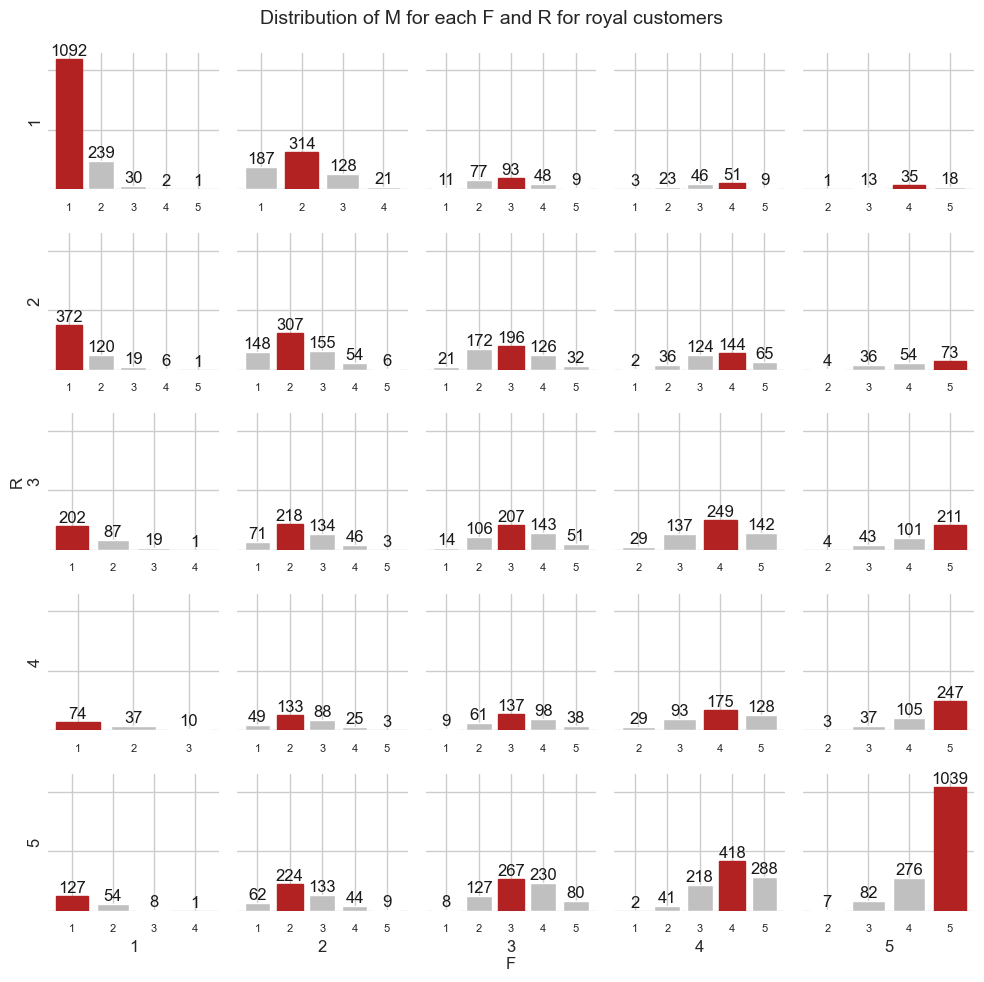

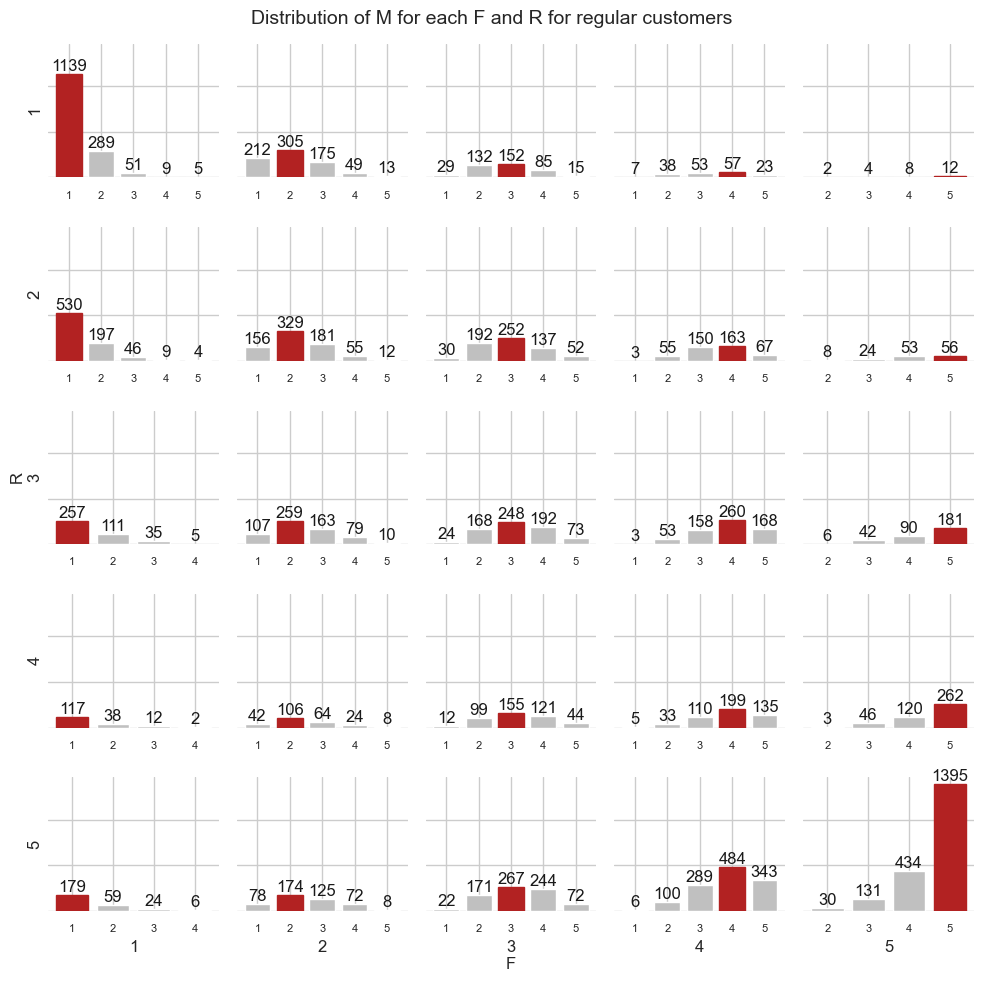

(None, None)

In [57]:
plot_rfm(rfm_royal), plot_rfm(rfm_regular)

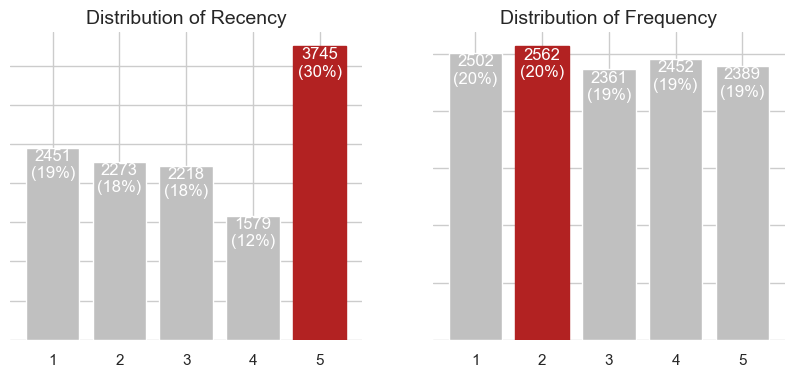

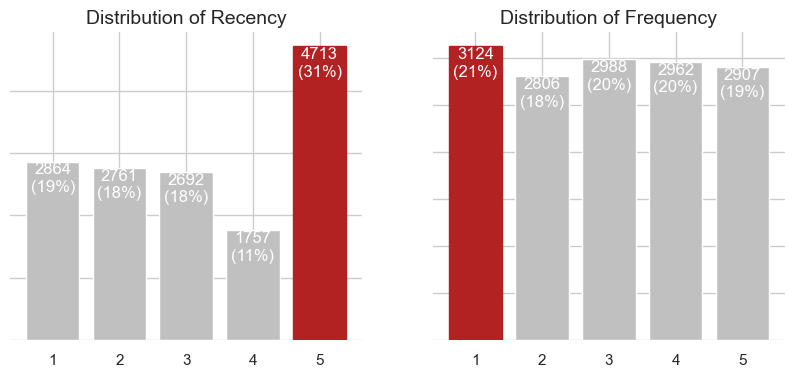

(None, None)

In [58]:
plot_rf(rfm_royal), plot_rf(rfm_regular)

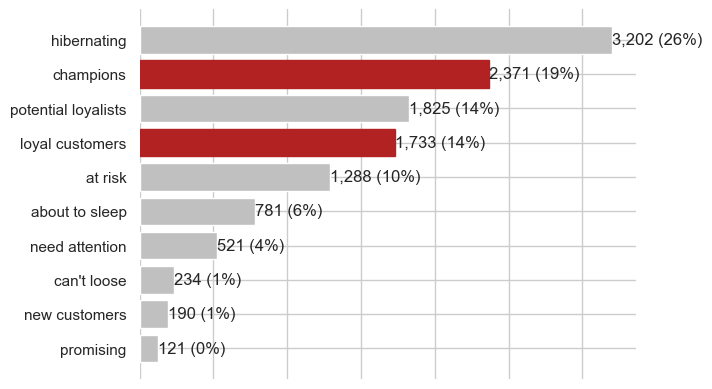

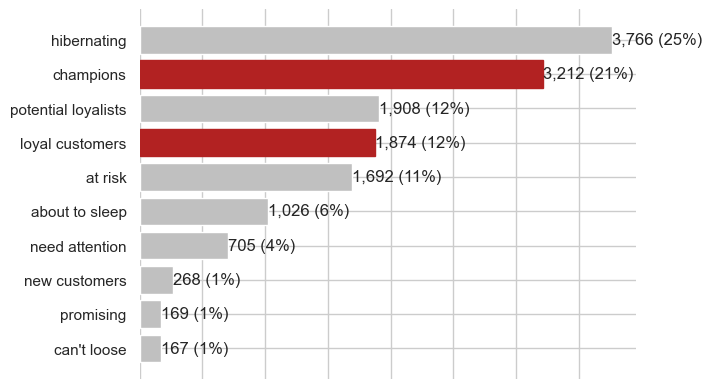

(None, None)

In [59]:
plot_custnum(rfm_royal), plot_custnum(rfm_regular)

In [61]:
a1 = rfm_royal.groupby(['RFM Score'], as_index = False)[['CUSTCARDNUMBER']].count()
a2 = rfm_regular.groupby(['RFM Score'], as_index = False)[['CUSTCARDNUMBER']].count()
rfm_test = a1.merge(a2, on = 'RFM Score')
rfm_test.rename(columns= {'CUSTCARDNUMBER_x': 'royal', 'CUSTCARDNUMBER_y': 'regular'}, inplace = True)
rfm_test.head()

,RFM Score,royal,regular
0,111,1092,1139
1,112,239,289
2,113,30,51
3,114,2,9
4,115,1,5


## Prepare data for AB Testing

In [63]:
def retention_prep(df): 
    test = df[['BEGINTIMESTAMP','CUSTCARDNUMBER']]
    firstseen = test.groupby(['CUSTCARDNUMBER'], as_index = False)[['BEGINTIMESTAMP']].min()
    firstseen.rename(columns = {'BEGINTIMESTAMP': 'firstseen'}, inplace = True)
    test = test.merge(firstseen, on = 'CUSTCARDNUMBER')
    test.BEGINTIMESTAMP = pd.to_datetime(test.BEGINTIMESTAMP)
    test.firstseen = pd.to_datetime(test.firstseen)
    test['ret'] = pd.Series(delta.days for delta in (test.BEGINTIMESTAMP - test.firstseen ))
    retention = test.groupby(['firstseen', 'ret'], \
                             as_index = False).agg({'CUSTCARDNUMBER': pd.Series.nunique}).rename(columns = {'CUSTCARDNUMBER': 'cust_num'})

    ret_data = retention.pivot_table(index = 'firstseen', 
                                     columns = 'ret', 
                                     values = 'cust_num').add_prefix('ret_')

    ret_data.fillna(0, inplace = True)
    ret_data = ret_data.divide(ret_data.iloc[:,0], axis = 0)
    ret_mean = pd.DataFrame(ret_data.mean())
    ret_mean.rename(columns = {0 : 'retention_rate'}, inplace = True)
    ret_mean.reset_index(inplace = True)
    ret_mean.drop('ret', axis = 1, inplace = True)
    return ret_mean

In [64]:
ret_mean_royal= retention_prep(df[df.customer_group.eq('royal')])
ret_mean_regular = retention_prep(df[df.customer_group.eq('regular')])
len(ret_mean_royal), len(ret_mean_regular)

(233, 245)

In [65]:
AB_testing = ret_mean_royal.copy()
AB_testing = AB_testing.merge(ret_mean_regular, left_index = True, right_index = True, how = 'left')
AB_testing.rename(columns = {'retention_rate_x': 'royal_rate', 'retention_rate_y': 'regular_rate'}, inplace = True)
AB_testing.tail()

,royal_rate,regular_rate
228,0.000082,0.179932
229,0.000163,0.174917
230,0.000082,0.178603
231,0.000082,0.182612
232,0.000082,0.161583


Text(0.5, 1.0, 'Customer Retention Rate')

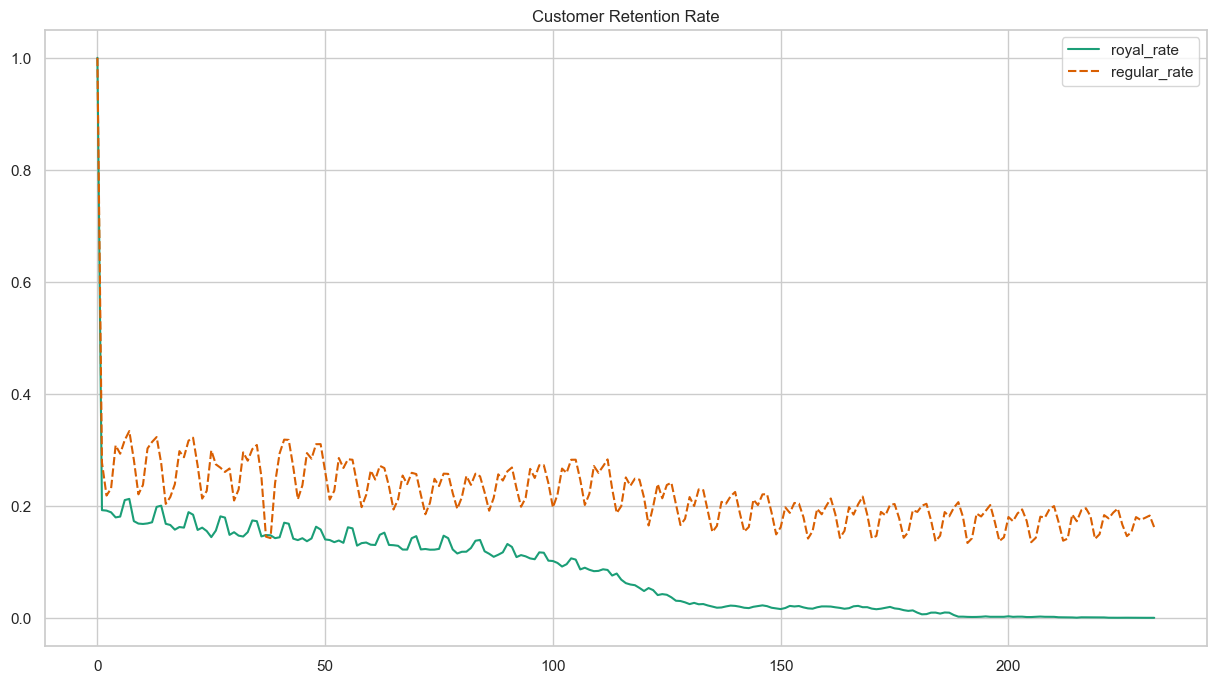

In [66]:
plt.figure(figsize = (15,8))
sns.lineplot(data = AB_testing)
plt.title('Customer Retention Rate')

## Statistical Test

In [67]:
from scipy import stats
ttest, p_value =stats.ttest_ind( AB_testing.royal_rate,AB_testing.regular_rate, equal_var=False)
print ('Ttest:', ttest,' p_value:', p_value)
# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

Ttest: -18.99005912550835  p_value: 4.1445674542845555e-59
Significant Result


The result shows that the campaign has a better impact of the retention rate on customers than the normal payment method. 

In [68]:
AB_testing.royal_rate.std(), AB_testing.regular_rate.std()

(0.08978485099897808, 0.07007615447061752)

In [69]:
 # get confidence interval 
def get_ci(value, cl, sd):
    loc = stats.norm.ppf(1 - cl/2)
    rng_val = stats.norm.cdf(loc - value/sd)

    lwr_bnd = value - rng_val
    upr_bnd = value + rng_val 

    return_val = (lwr_bnd, upr_bnd)
    return(return_val)



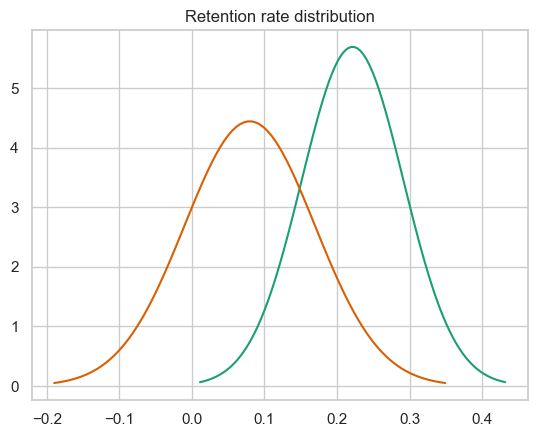

In [70]:
import matplotlib
# Compute the standard deviations
control_sd =  AB_testing.regular_rate.var()**0.5
test_sd = AB_testing.royal_rate.var()**0.5

# Create the range of x values 
control_line = np.linspace(AB_testing.regular_rate.mean() - 3 * control_sd, AB_testing.regular_rate.mean() + 3 * control_sd, 100)
test_line = np.linspace(AB_testing.royal_rate.mean() - 3 * test_sd ,AB_testing.royal_rate.mean() +  3 * test_sd, 100)

# Plot the distribution     
plt.plot(control_line, stats.norm.pdf(control_line, AB_testing.regular_rate.mean(), control_sd))
plt.plot(test_line, stats.norm.pdf(test_line, AB_testing.royal_rate.mean() , test_sd))
plt.title('Retention rate distribution')
plt.show()



In [71]:
# Calculate the mean of our lift distribution 
lift_mean = AB_testing.royal_rate.mean() - AB_testing.regular_rate.mean()

# Calculate variance and standard deviation 
lift_variance = (1 - AB_testing.royal_rate.mean()) *\
                AB_testing.royal_rate.mean() /len(AB_testing) + (1 - AB_testing.regular_rate.mean())*\
                 AB_testing.regular_rate.mean() / len(AB_testing)
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)


(-1.141689206911213, 0.8583011113295511)


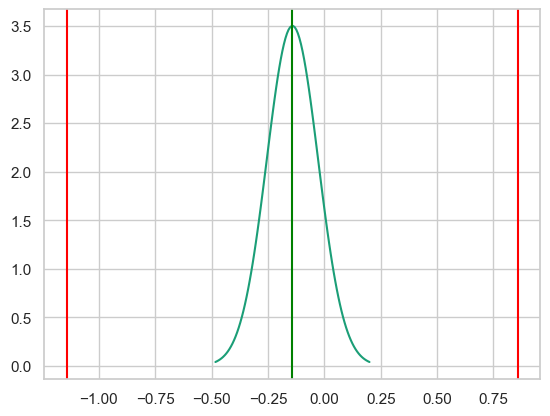

In [72]:
# Find the lift statistics
lift_sd = (AB_testing.royal_rate.var() + AB_testing.regular_rate.var()) ** 0.5

# Generate the range of x-values
lift_line = np.linspace(lift_mean - 3 * lift_sd, lift_mean + 3 * lift_sd, 100)

# Plot the distribution 
plt.plot(lift_line, stats.norm.pdf(lift_line, lift_mean, lift_sd))

# Add the annotation lines
plt.axvline(x = lift_mean, color = 'green')
plt.axvline(x = confidence_interval[0], color = 'red')
plt.axvline(x = confidence_interval[1], color = 'red')
plt.show()